In [1]:
import pandas as pd
import numpy as np

In [3]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\Kagel_Bynary_prediction_Poisonus Mushrooms\mushroom\data\clean\clean.parquet'

In [4]:
data = pd.read_parquet(path)

In [5]:
df = data.copy()

In [6]:
df.head(3)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,0,0,w,0,0,d,a
1,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,0,s,n,0,0,l,w
2,3,e,3.88,f,y,g,f,s,0,g,4.16,6.53,0,0,w,0,0,d,u


In [7]:
del df['id']
del df['gill-spacing']
del df['does-bruise-or-bleed']

In [8]:
df.shape

(1528562, 16)

Correlacion columnas CATEGORICAS

In [9]:
from scipy.stats import chi2_contingency

In [10]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))


# Crear la funcion 
def cramers_v_matrix(df):
    cols = df.select_dtypes(include=['object','category']).columns.tolist()
    n_cols = len(cols)
    cramers_mat = np.zeros((n_cols,n_cols))
    
    for i in range(n_cols):
        for j in range (i+1, n_cols):
            cramers_mat[i, j] = cramers_v(df[cols[i]], df[cols[j]])
            cramers_mat[j, i] = cramers_mat[i, j]
    
    return pd.DataFrame(cramers_mat, columns=cols, index=cols)
    


In [11]:
correlation_matrix = cramers_v_matrix(df)
print(correlation_matrix)

                      class  cap-shape  cap-surface  cap-color  \
class              0.000000   0.170024     0.316951   0.221035   
cap-shape          0.170024   0.000000     0.206127   0.061950   
cap-surface        0.316951   0.206127     0.000000   0.278523   
cap-color          0.221035   0.061950     0.278523   0.000000   
gill-attachment    0.266407   0.293933     0.328198   0.290501   
gill-color         0.259178   0.070502     0.239736   0.138667   
stem-root          0.169211   0.059682     0.185520   0.080915   
stem-surface       0.239737   0.107887     0.250594   0.090526   
stem-color         0.280767   0.087148     0.245125   0.162875   
veil-color         0.148772   0.064174     0.139614   0.040268   
spore-print-color  0.121327   0.054288     0.190741   0.079841   
habitat            0.159177   0.050221     0.150764   0.093438   
season             0.155658   0.160937     0.138101   0.133909   

                   gill-attachment  gill-color  stem-root  stem-surface  \


In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

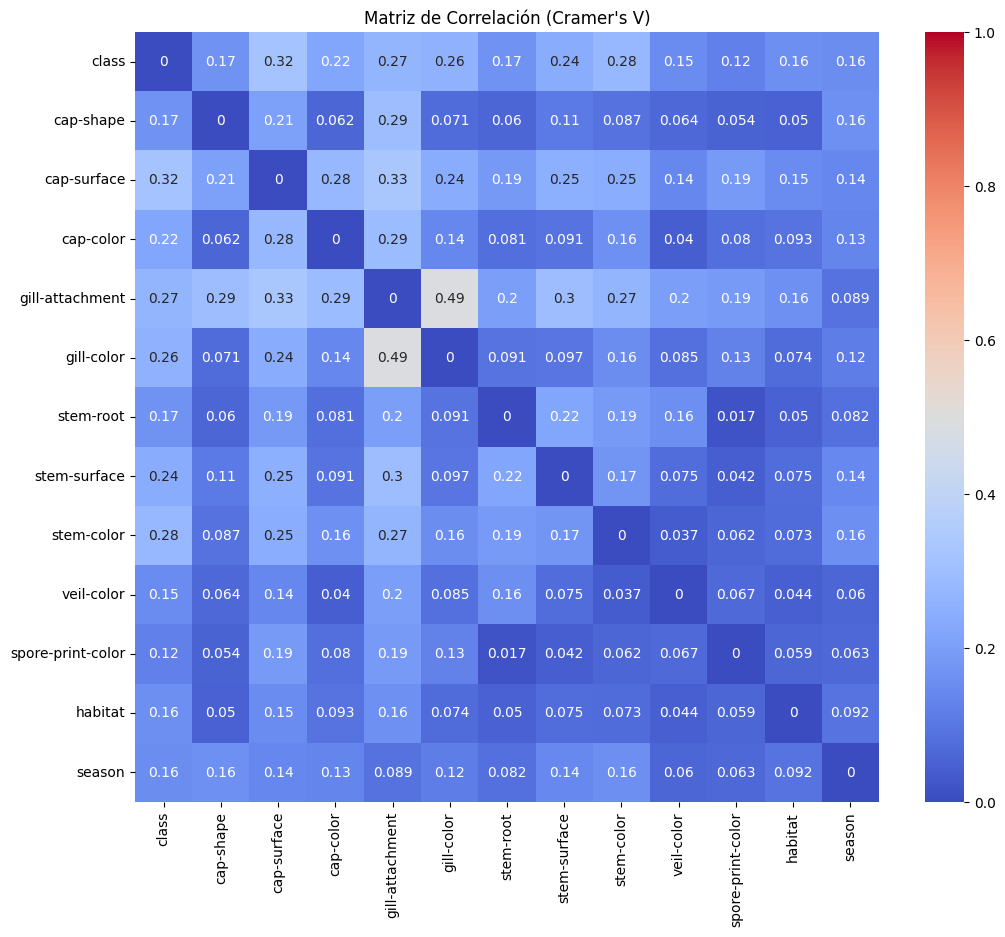

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, center=0.5)
plt.title("Matriz de Correlación (Cramer's V)")
plt.show()

In [15]:
columnas_categoricas = df.select_dtypes(include=['object','category']).columns.tolist()

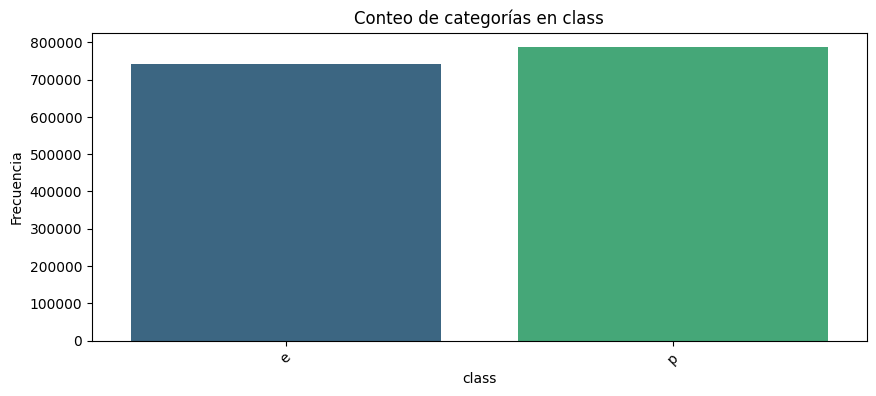

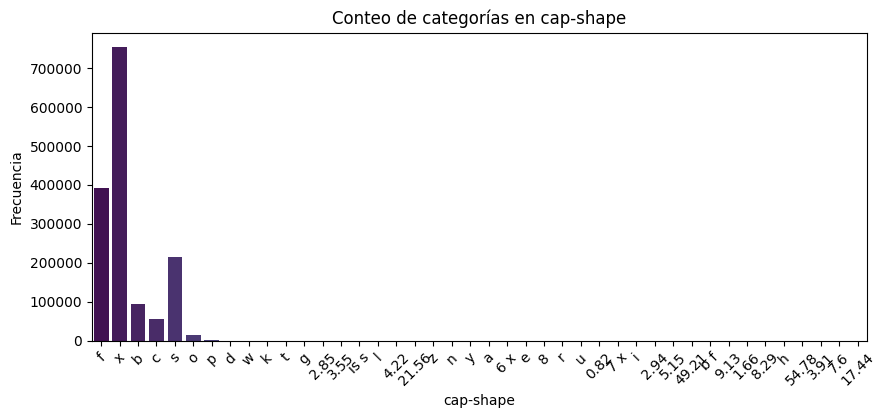

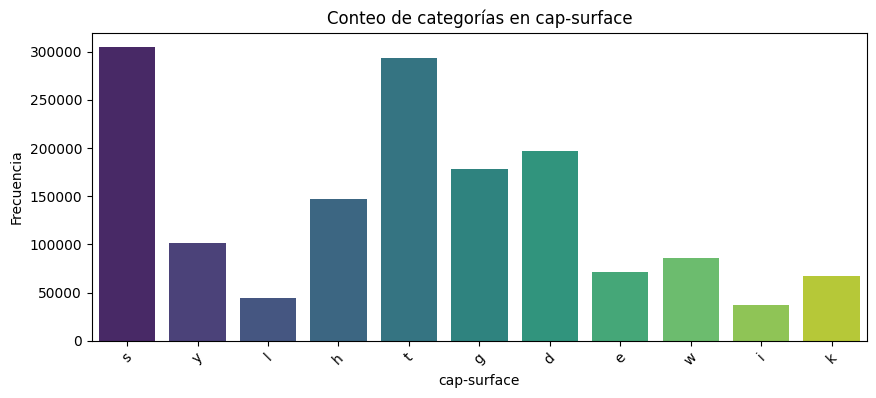

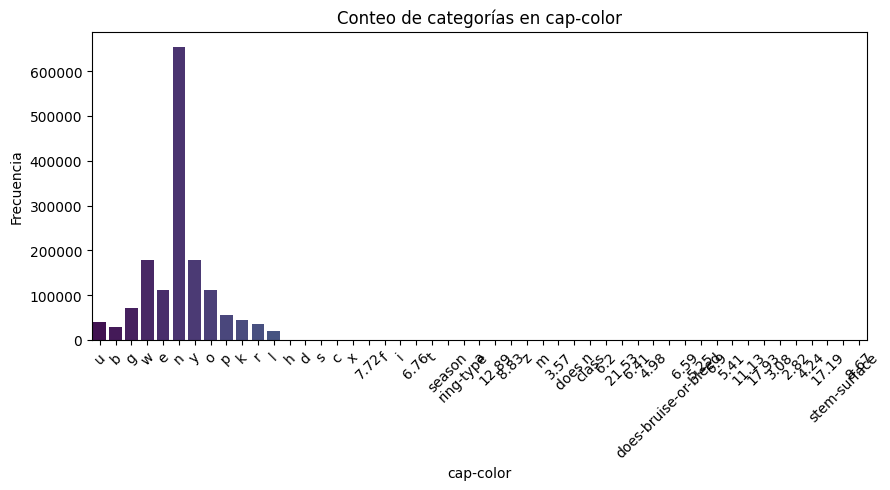

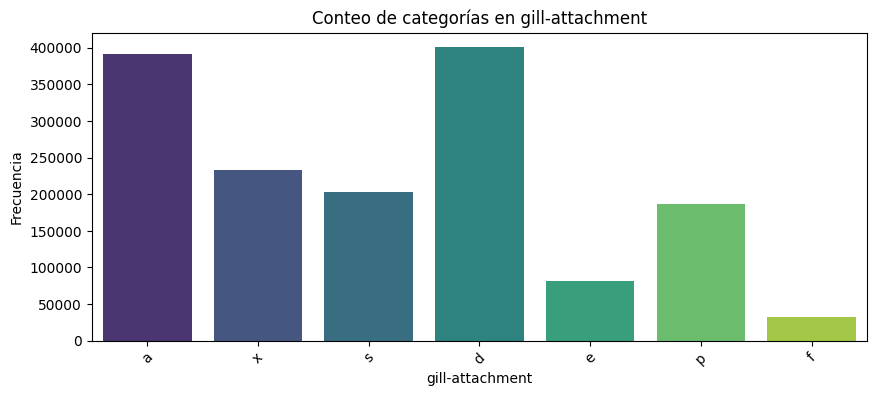

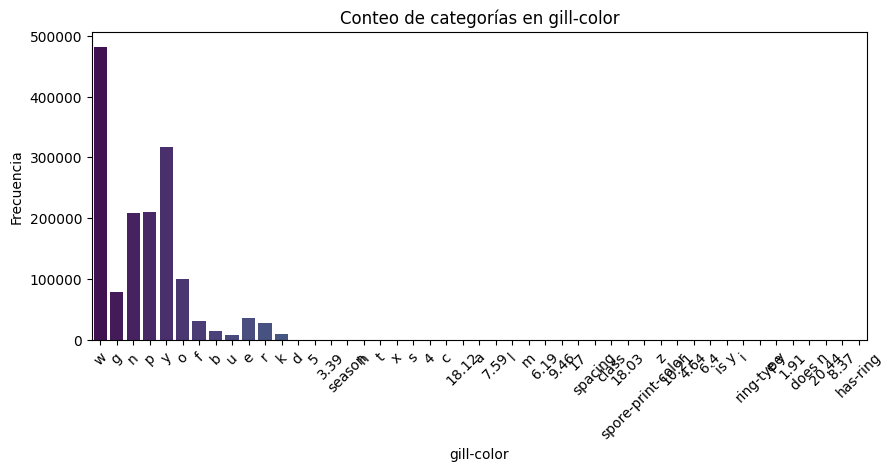

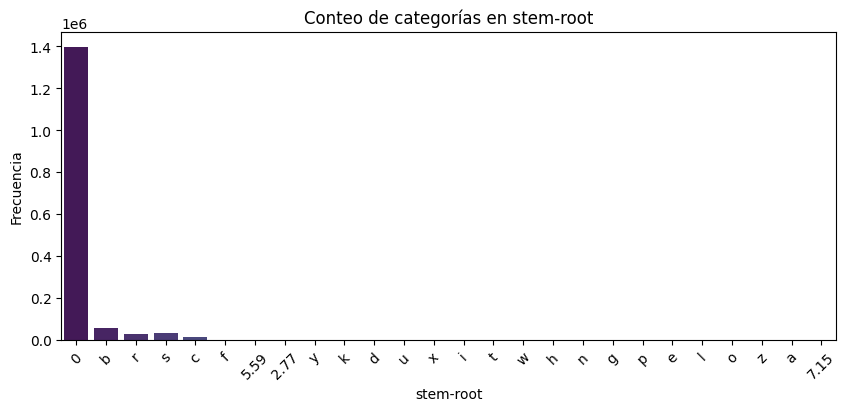

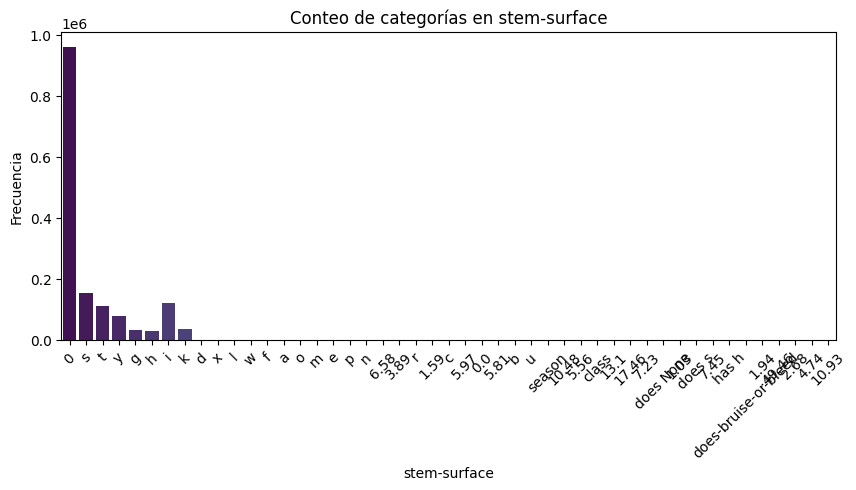

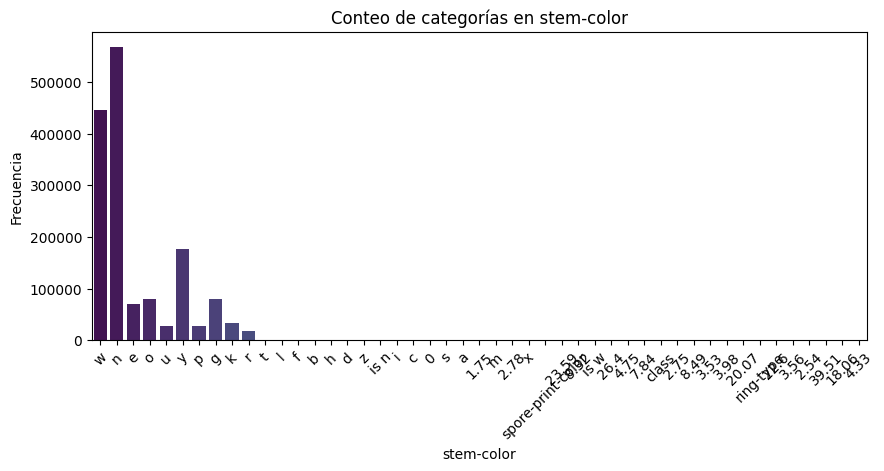

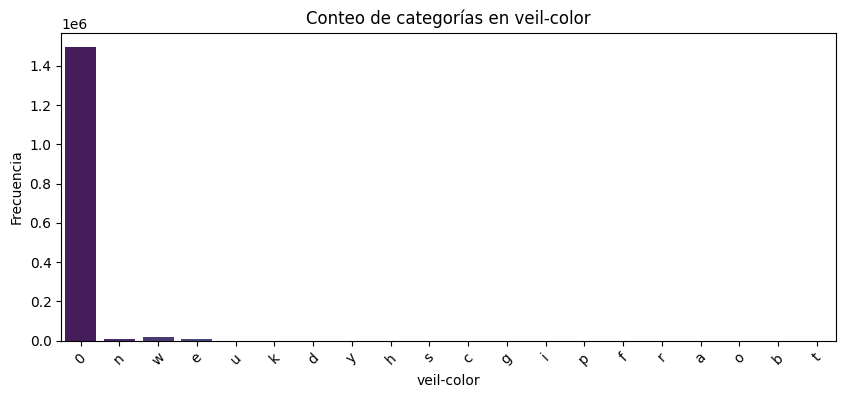

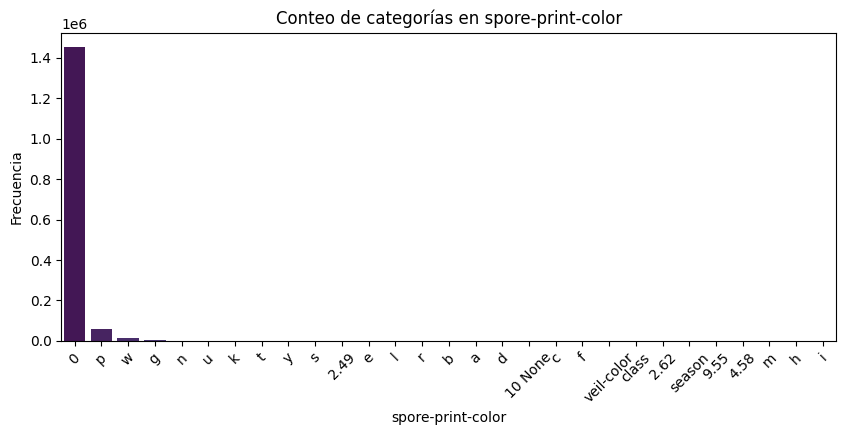

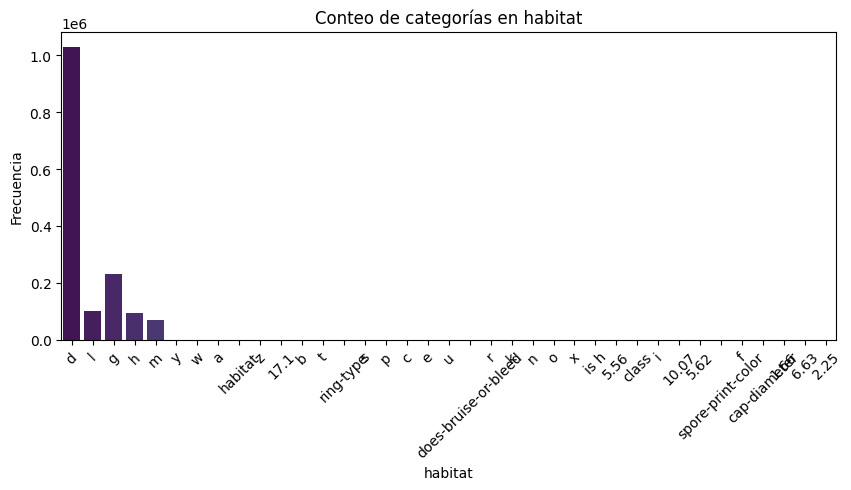

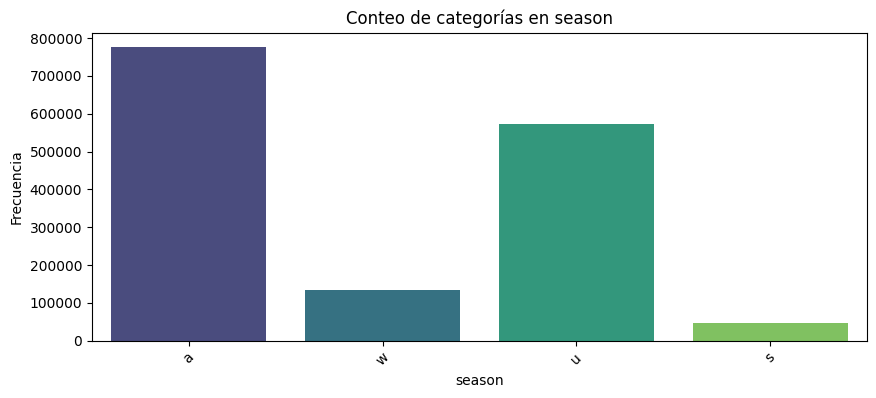

In [43]:
for col in columnas_categoricas:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Conteo de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

In [18]:
df.shape

(1528562, 16)

Replace single values

In [61]:
df1 = df.copy()

In [62]:
for col in columnas_categoricas:
    v_counts = df1[col].value_counts()
    v_remplazar = v_counts[v_counts < 1000].index
    df1[col] = df1[col].replace(v_remplazar, 'un')

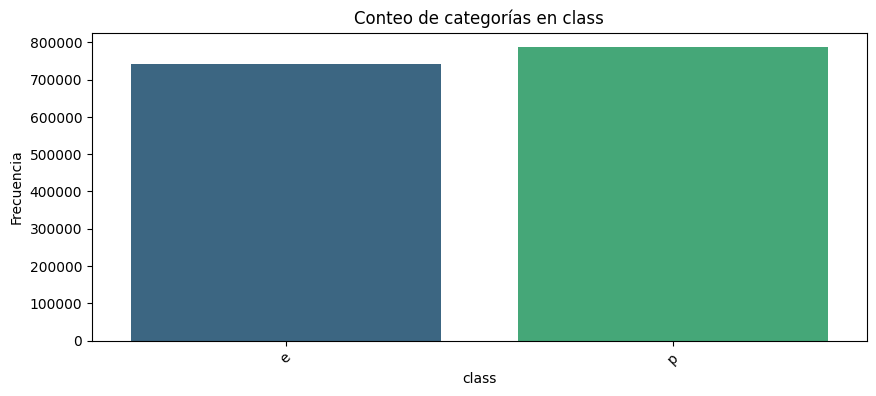

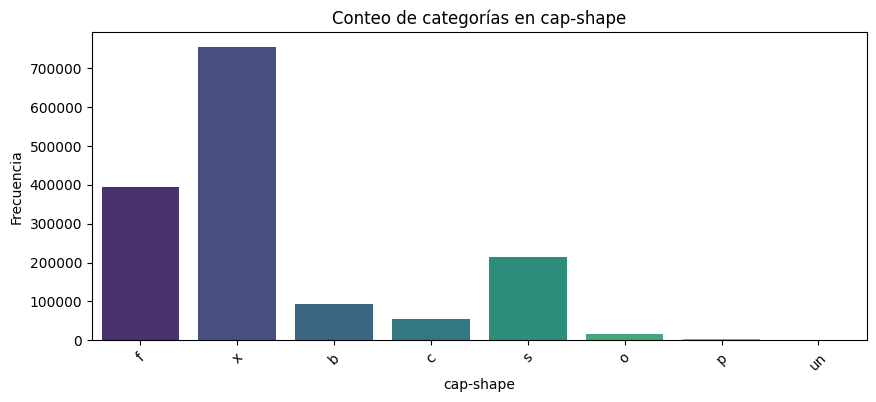

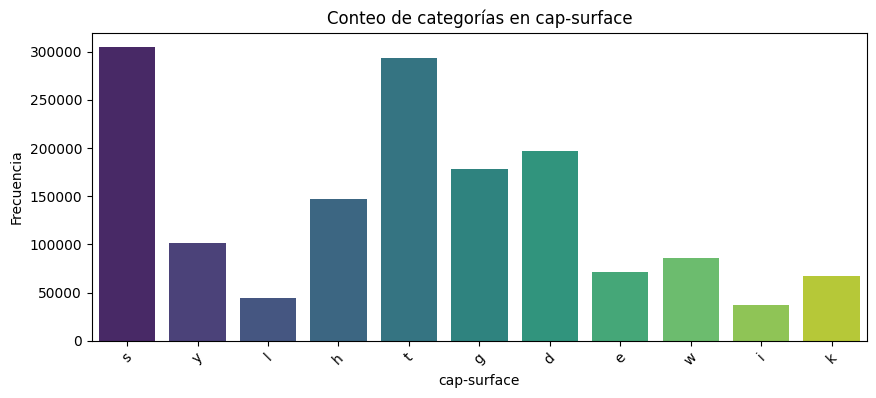

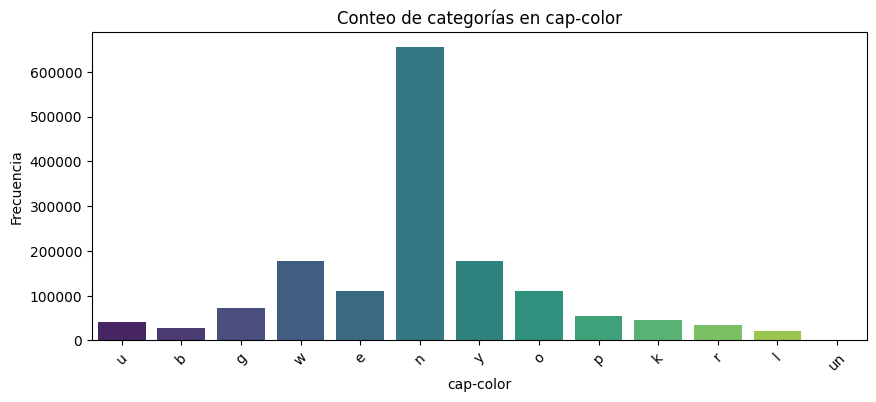

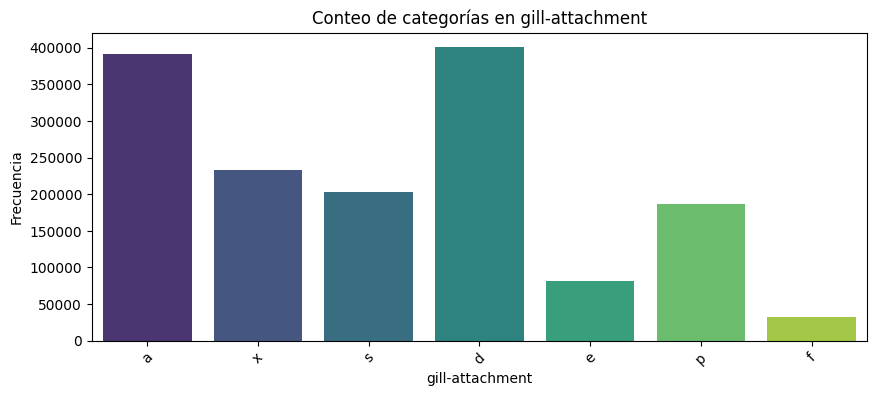

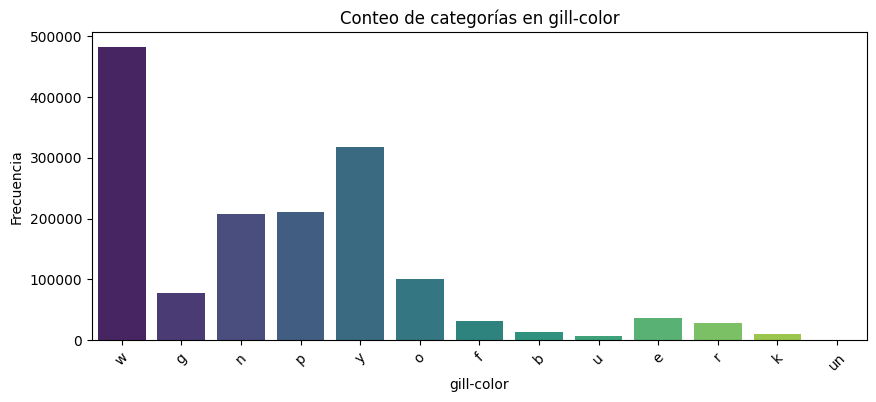

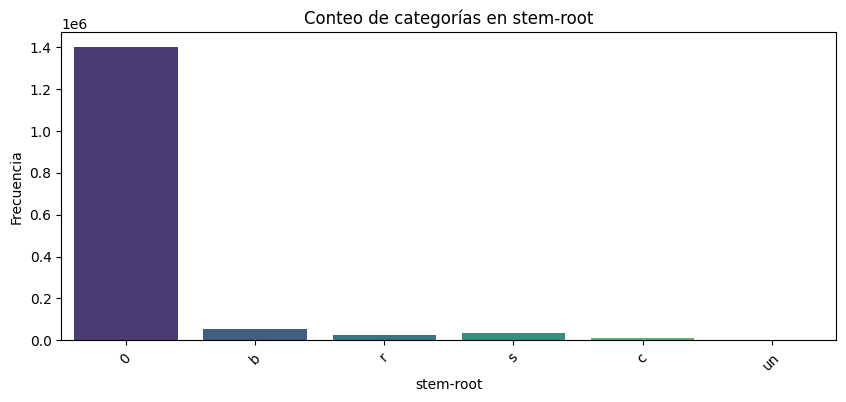

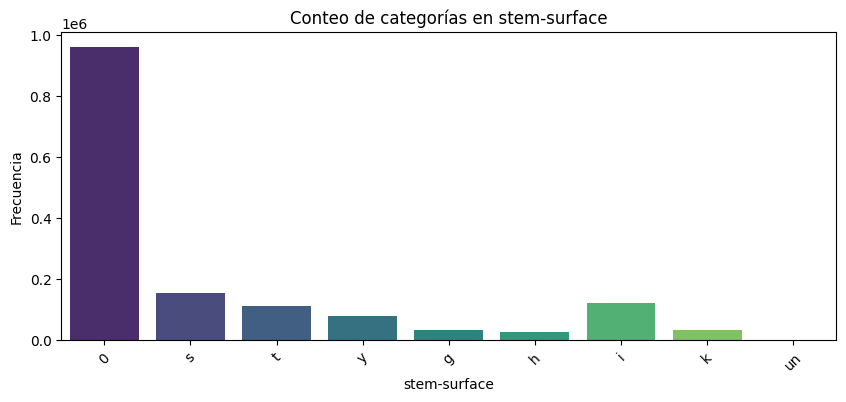

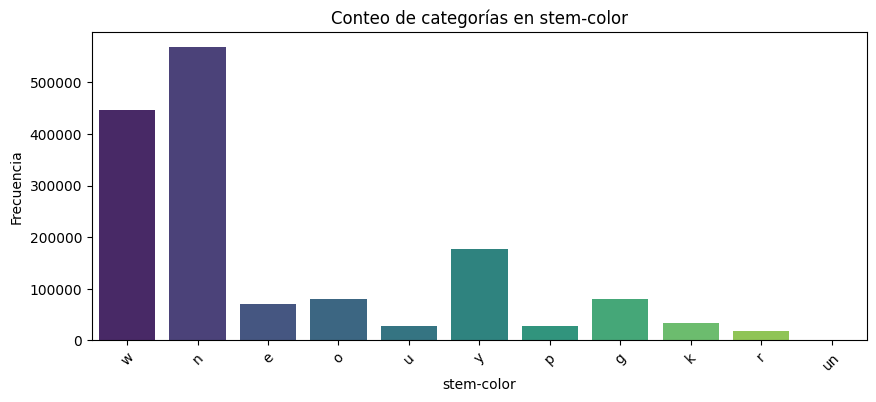

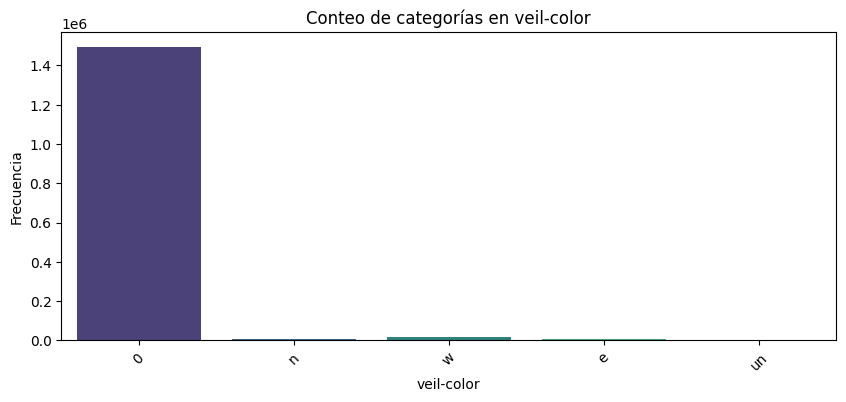

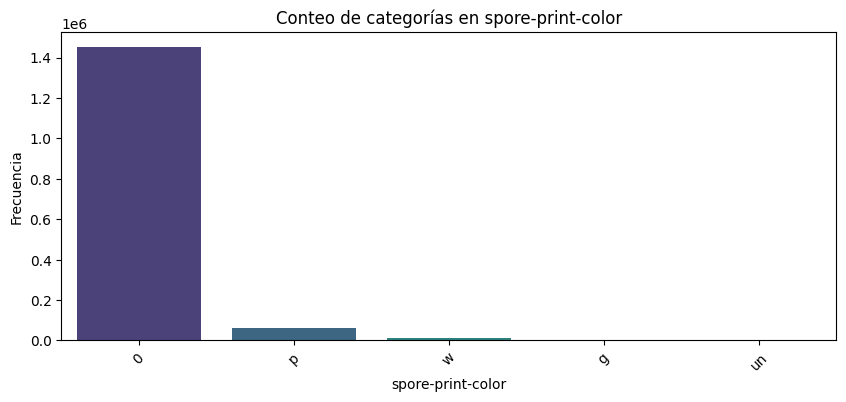

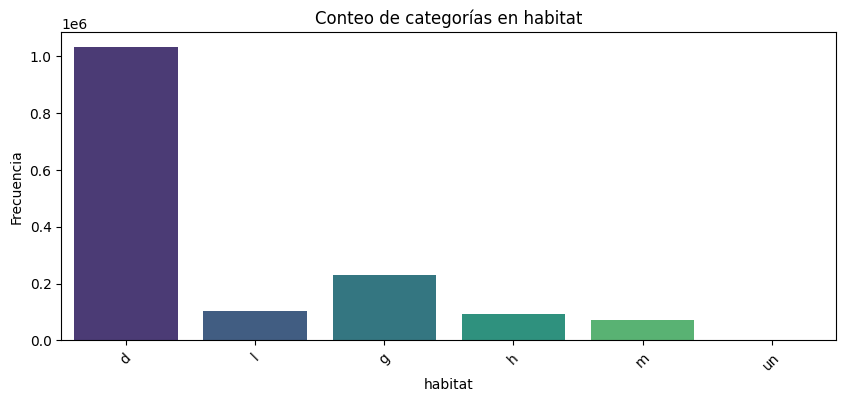

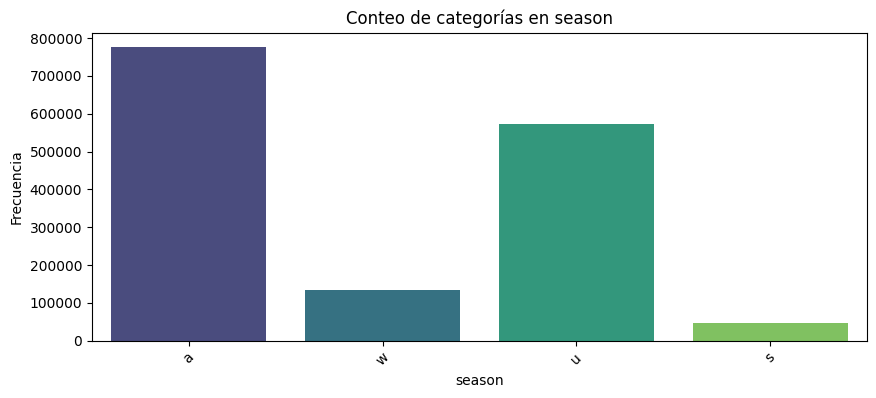

In [63]:
for col in columnas_categoricas:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df1, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Conteo de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

In [64]:
df1.shape

(1528562, 16)

In [89]:
df2 = df1.copy()

Column Laveling

In [75]:
from sklearn.preprocessing import LabelEncoder

In [90]:
label_encoders = {}
for col in columnas_categoricas:
    if col in df2.columns:  # Check if the column exists in df2
        le = LabelEncoder()
        df2[col] = le.fit_transform(df2[col])
        label_encoders[col] = le
    else:
        print(f"Column '{col}' not found in DataFrame")   

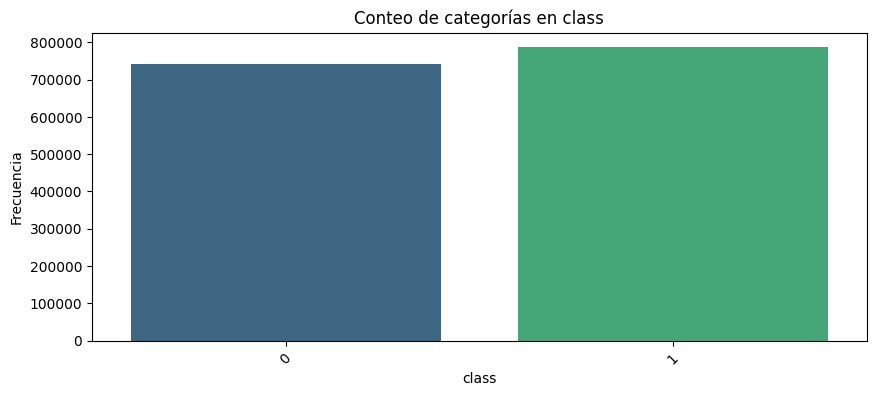

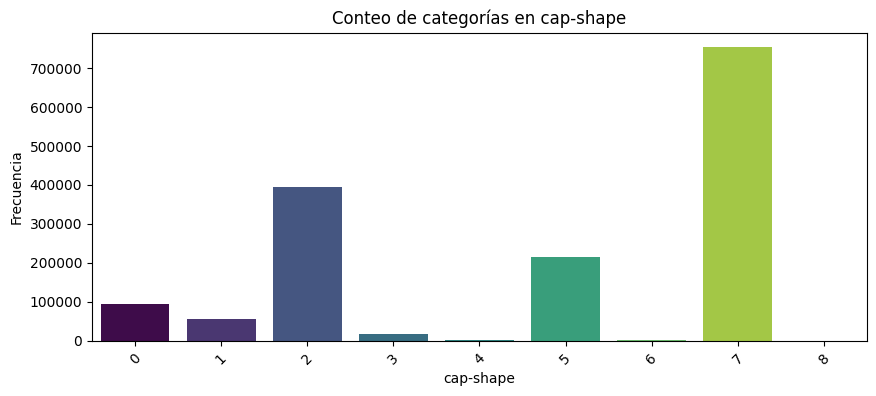

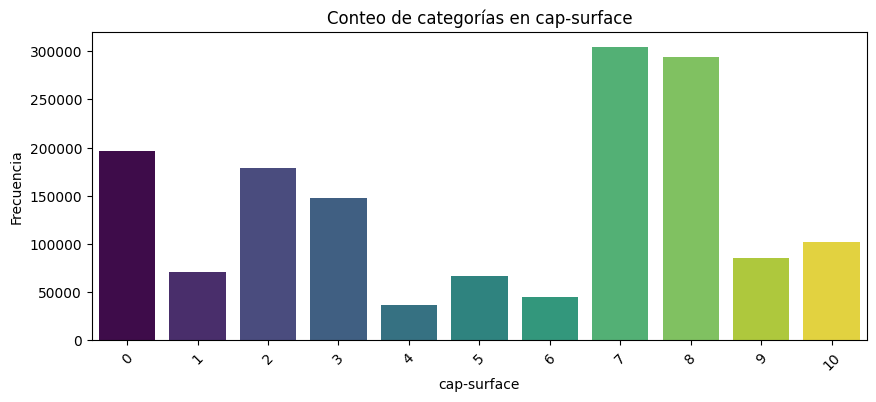

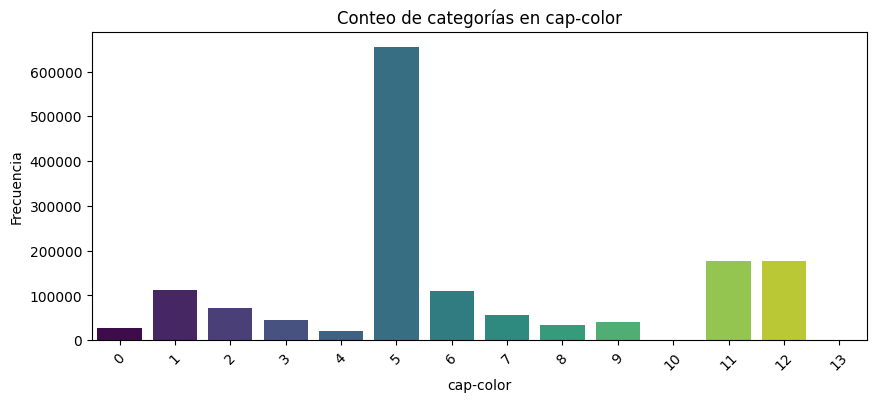

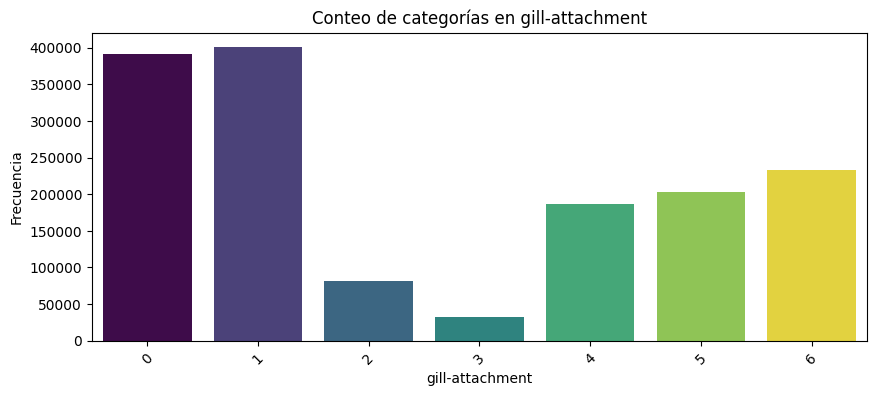

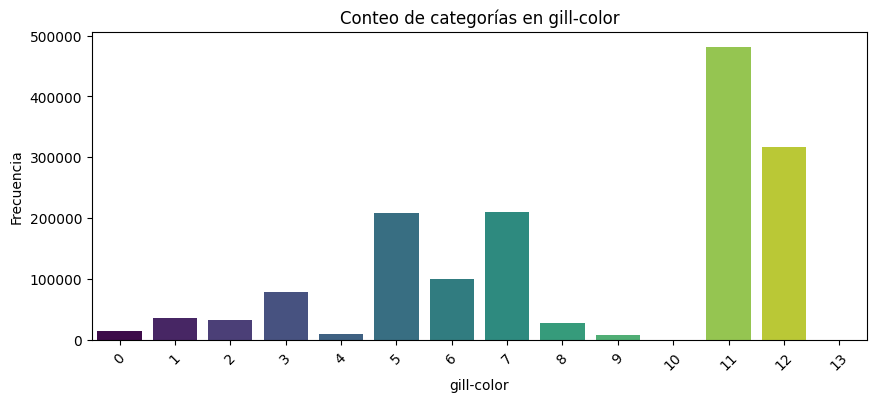

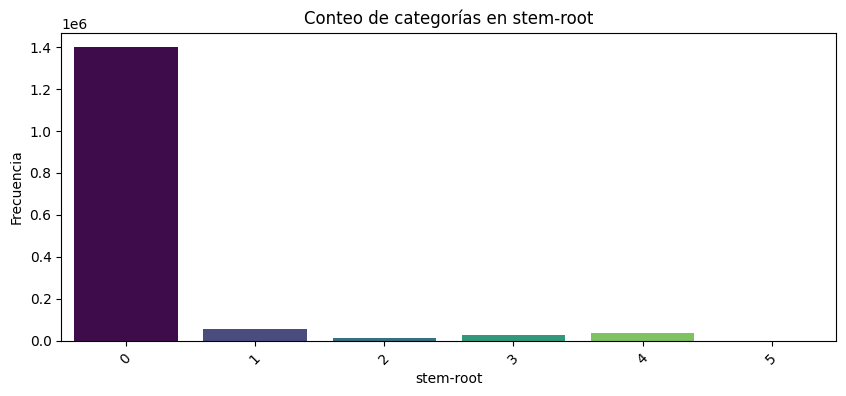

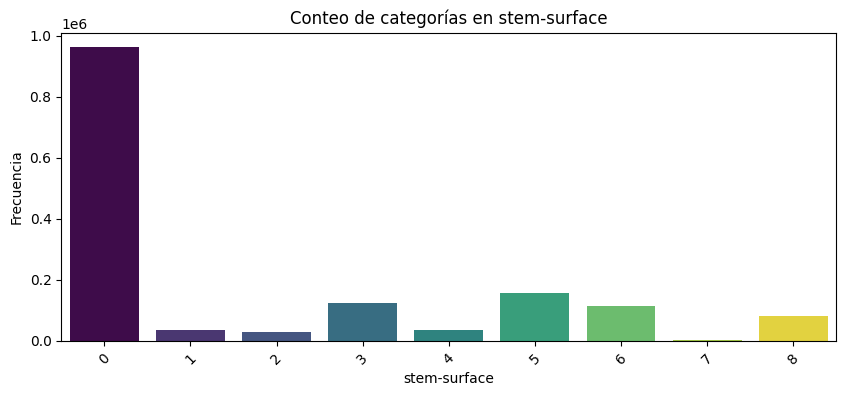

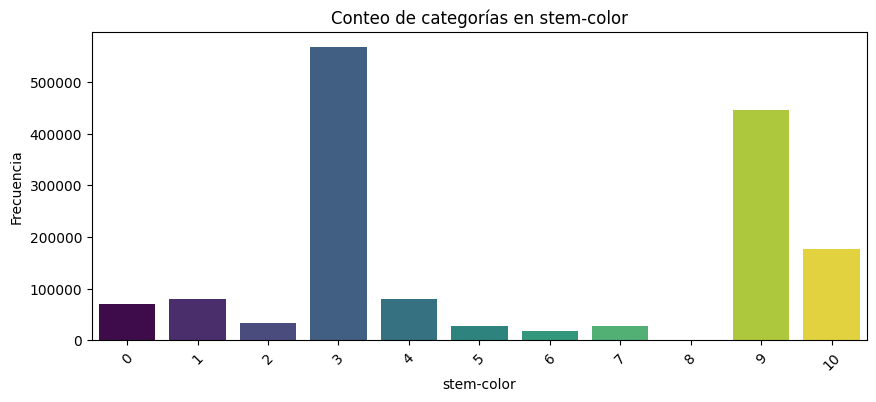

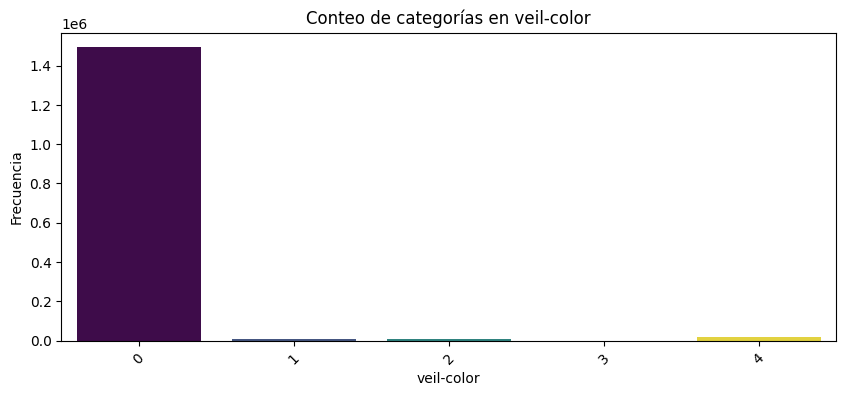

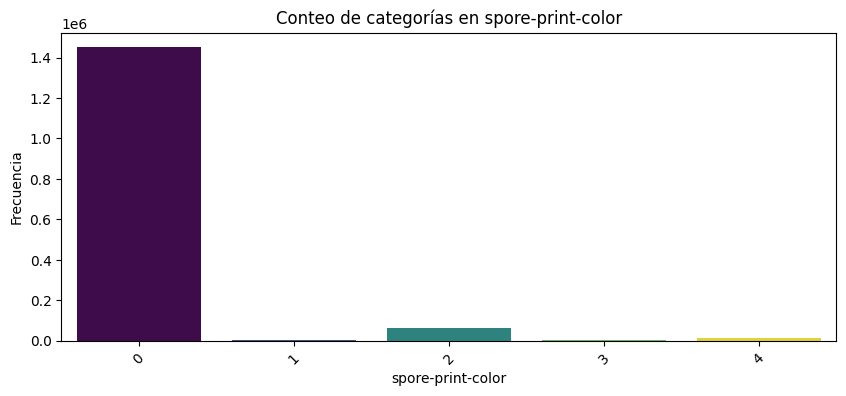

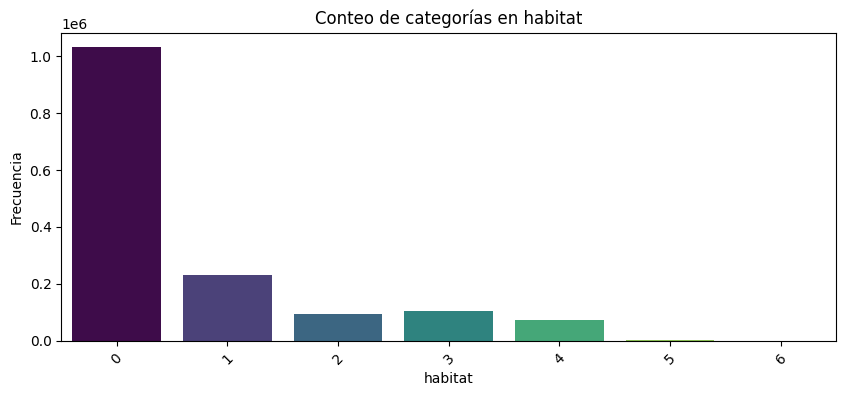

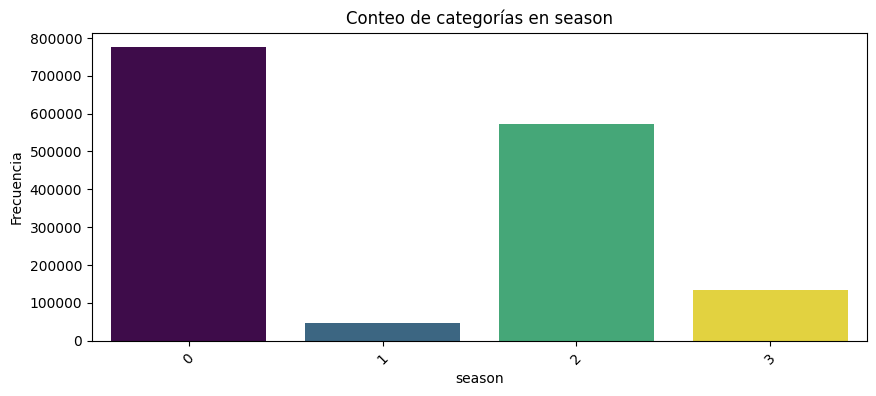

In [91]:
for col in columnas_categoricas:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df2, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Conteo de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528562 entries, 0 to 1528561
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   class              1528562 non-null  int64  
 1   cap-diameter       1528561 non-null  float64
 2   cap-shape          1528562 non-null  int64  
 3   cap-surface        1528562 non-null  int64  
 4   cap-color          1528562 non-null  int64  
 5   gill-attachment    1528562 non-null  int64  
 6   gill-color         1528562 non-null  int64  
 7   stem-height        1528562 non-null  float64
 8   stem-width         1528562 non-null  float64
 9   stem-root          1528562 non-null  int64  
 10  stem-surface       1528562 non-null  int64  
 11  stem-color         1528562 non-null  int64  
 12  veil-color         1528562 non-null  int64  
 13  spore-print-color  1528562 non-null  int64  
 14  habitat            1528562 non-null  int64  
 15  season             1528562 non-n

CORRELATION TO [CLASS]

In [97]:
corr_m = df2.corr()

In [98]:
cort = abs(corr_m['class'])

In [100]:
no_relevant_features = cort[cort<0.02]

In [101]:
no_relevant_features

cap-color            0.008010
spore-print-color    0.019772
habitat              0.000425
Name: class, dtype: float64

In [103]:
relevant_features = cort[cort>=0.02]
relevant_features

class              1.000000
cap-diameter       0.085203
cap-shape          0.035563
cap-surface        0.062003
gill-attachment    0.042261
gill-color         0.063503
stem-height        0.121462
stem-width         0.073448
stem-root          0.104950
stem-surface       0.025771
stem-color         0.073975
veil-color         0.068279
season             0.078105
Name: class, dtype: float64

The columns : habitat, cap-color, spore-print  are not relevant features and will be droped.

In [105]:
df2.shape

(1528562, 16)

In [106]:
del df2['habitat']

In [107]:
del df2['cap-color']
del df2['spore-print-color']

In [108]:
df2.shape

(1528562, 13)

In [109]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\Kagel_Bynary_prediction_Poisonus Mushrooms\mushroom\data\clean\clean2.parquet'

In [110]:
df2.to_parquet(path)